In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel("/content/sample_data/BusinessCustomerData.xlsx")


In [ ]:
df.info()

In [1062]:
df.columns

Index(['encrypted_bussiness_account_id', 'country', 'ppimode_accountlevel',
       'name', 'registered_date', 'feature', 'group_id', 'group_name', 'ubu',
       'public_group', 'ppimode_grouplevel', 'eproc_system', 'automated_tier',
       'recon_sysname', 'checkout_enabled', 'checkout_enabled_date',
       'group_pay_enabled', 'self_pay_enabled', 'weekend_delivery',
       'tax_exemption_disabled', 'tax_exemption_opt_out_disabled',
       'no_of_paymentinstruments', 'no_of_shippingaddresses',
       'payment_instrument', 'buyer_orderconf_emails',
       'admin_orderconf_emails', 'min_ppi_config_date',
       'min_test_ppi_order_day', 'max_test_ppi_order_day', 'min_ppi_order_day',
       'max_ppi_order_day', 'user_count', 'punchout_user_count', 'sales_rep',
       'manager', 'territory', 'territory_team', 'industry', 'sub_industry',
       'sector'],
      dtype='object')

In [3]:
df.drop(['group_id', 'group_name','ubu','territory_team','sector','punchout_user_count', 'sales_rep',
       'manager','tax_exemption_opt_out_disabled','public_group', 'ppimode_grouplevel','payment_instrument', 'buyer_orderconf_emails',
       'admin_orderconf_emails','min_test_ppi_order_day', 'max_test_ppi_order_day',"min_ppi_config_date","min_ppi_order_day","max_ppi_order_day","sub_industry"], axis = 1, inplace=True)

In [ ]:
df.info() 

In [4]:
df.drop_duplicates(subset=['encrypted_bussiness_account_id'], keep='first', inplace=True)

In [5]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df

In [1068]:
df.columns[df.isna().any()].tolist()

['recon_sysname',
 'checkout_enabled_date',
 'no_of_paymentinstruments',
 'no_of_shippingaddresses',
 'user_count',
 'territory']

In [6]:
df['recon_sysname'].fillna('Other',inplace=True)

In [7]:
df['checkout_enabled_date'] = df['checkout_enabled_date'].fillna(df['registered_date'])

In [8]:
df['no_of_paymentinstruments'].fillna(0,inplace=True)

In [9]:
df['no_of_shippingaddresses'].fillna(0,inplace=True)

In [10]:
df['user_count'].fillna(0,inplace=True)

In [11]:
df.loc[df['eproc_system'].str.contains('Oracle'), 'eproc_system'] = 'Oracle'

In [12]:
df.loc[df['eproc_system'].str.contains('DirectOrdering'), 'eproc_system'] = 'DirectOrdering'

In [13]:
df.loc[df['eproc_system'].str.contains('Direct-Ordering'), 'eproc_system'] = 'DirectOrdering'

In [14]:
df.loc[df['eproc_system'].str.contains('PSG'), 'eproc_system'] = 'Others'
df.loc[df['eproc_system'].str.contains('McDean'), 'eproc_system'] = 'Others'
df.loc[df['eproc_system'].str.contains('System'), 'eproc_system'] = 'Others'
df.loc[df['eproc_system'].str.contains('PSG'), 'eproc_system'] = 'Others'
df.loc[df['eproc_system'].str.contains('PowerSchool'), 'eproc_system'] = 'PowerSchool'
df.loc[df['eproc_system'].str.contains('SAP'), 'eproc_system'] = 'SAP'
df.loc[df['eproc_system'].str.contains('Infor'), 'eproc_system'] = 'Infor'
df.loc[df['eproc_system'].str.contains('Alpha'), 'eproc_system'] = 'Alpha'
df.loc[df['eproc_system'].str.contains('SDI-PUNCHOUT'), 'eproc_system'] = 'Others'
df.loc[df['eproc_system'].str.contains('Pool4Tool'), 'eproc_system'] = 'SciQuest-JAGGAER'
df.loc[df['eproc_system'].str.contains('Ariba'), 'eproc_system'] = 'Ariba'
df.loc[df['eproc_system'].str.contains('Test'), 'eproc_system'] = 'Others'
df.loc[df['eproc_system'].str.contains('test'), 'eproc_system'] = 'Others'
df.loc[df['eproc_system'].str.contains('Direct--Ordering'), 'eproc_system'] = 'DirectOrdering'
df.loc[df['eproc_system'].str.contains('Osaka_University'), 'eproc_system'] = 'Others'
df.loc[df['eproc_system'].str.contains('Coupa'), 'eproc_system'] = 'Others'
df.loc[df['eproc_system'].str.contains('TylerTechnologies'), 'eproc_system'] = 'TylerTechnologies'
df.loc[df['eproc_system'].str.contains('Proactis'), 'eproc_system'] = 'Proactis'
df.loc[df['eproc_system'].str.contains('ExpenseWatch'), 'eproc_system'] = 'ExpenseWatch'
df.loc[df['eproc_system'].str.contains('buy@Facebook'), 'eproc_system'] = 'ExpenseWatch'
df.loc[df['eproc_system'].str.contains('POOL4TOOL'), 'eproc_system'] = 'SciQuest-JAGGAER'
df.loc[df['eproc_system'].str.contains('SunGard'), 'eproc_system'] = 'PowerSchool'
df.loc[df['eproc_system'].str.contains('MicrosoftDynamics'), 'eproc_system'] = 'MicrosoftDynamics'
df.loc[df['eproc_system'].str.contains('GHX'), 'eproc_system'] = 'GHX'
df.loc[df['eproc_system'].str.contains('3PigsLibraryBuyers'), 'eproc_system'] = 'DirectOrdering'
df.loc[df['eproc_system'].str.contains('PeopleSoft'), 'eproc_system'] = 'PeopleSoft'
df.loc[df['eproc_system'].str.contains('SpaceX'), 'eproc_system'] = 'Others'
df.loc[df['eproc_system'].str.contains('Determine'), 'eproc_system'] = 'Determine'
df.loc[df['eproc_system'].str.contains('Basware'), 'eproc_system'] = 'Basware'

In [15]:
df['territory'].fillna('Unknown',inplace=True)

In [16]:
df.loc[df['territory'].str.contains('Edu', case=False), 'territory'] = 'EDU'
df.loc[df['territory'].str.contains('SMB'), 'territory'] = 'SMB'
df.loc[df['territory'].str.contains('ENT'), 'territory'] = 'ENT'
df.loc[df['territory'].str.contains('EEDU'), 'territory'] = 'EDU'
df.loc[df['territory'].str.contains('COM', case=False), 'territory'] = 'COM'
df.loc[df['territory'].str.contains('LE'), 'territory'] = 'LE'
df.loc[df['territory'].str.contains('CE'), 'territory'] = 'ENT'
df.loc[df['territory'].str.contains('EHC'), 'territory'] = 'ENT'
df.loc[df['territory'].str.contains('Micro'), 'territory'] = 'SMB'
df.loc[df['territory'].str.contains('GOV'), 'territory'] = 'GOV'
df.loc[df['territory'].str.contains('SSMC'), 'territory'] = 'SMB'
df.loc[df['territory'].str.contains('EC'), 'territory'] = 'ENT'
df.loc[df['territory'].str.contains('SEDU'), 'territory'] = 'EDU'
df.loc[df['territory'].str.contains('SMC'), 'territory'] = 'SMB'
df.loc[df['territory'].str.contains('Energy, Resources and Utilities'), 'territory'] = 'ENT'
df.loc[df['territory'].str.contains('Manufacturing'), 'territory'] = 'ENT'
df.loc[df['territory'].str.contains('Enterprise'), 'territory'] = 'ENT'
df.loc[df['territory'].str.contains('&'), 'territory'] = 'ENT'
df.loc[df['territory'].str.contains('Exception'), 'territory'] = 'LE'
df.loc[df['territory'].str.contains('LMR'), 'territory'] = 'LE'
df.loc[df['territory'].str.contains('SSMR'), 'territory'] = 'SMB'
df.loc[df['territory'].str.contains('Transportation'), 'territory'] = 'ENT'
df.loc[df['territory'].str.contains('Automotive'), 'territory'] = 'ENT'
df.loc[df['territory'].str.contains('Reseller'), 'territory'] = 'ENT'
df.loc[df['territory'].str.contains('MR'), 'territory'] = 'ENT'

In [17]:
df.loc[df['territory'].str.contains('SMB'), 'territory'] = 'Small & Medium'
df.loc[df['territory'].str.contains('LE'), 'territory'] = 'Large Enterprise'
df.loc[df['territory'].str.contains('EDU'), 'territory'] = 'Education'
df.loc[df['territory'].str.contains('ENT'), 'territory'] = 'Enterprise'
df.loc[df['territory'].str.contains('GOV'), 'territory'] = 'Government'
df.loc[df['territory'].str.contains('COM'), 'territory'] = 'Commercial'

In [18]:
df["eproc_system"].value_counts()

Others            1627
DirectOrdering    1474
Skyward            607
SAP                347
Oracle             342
                  ... 
Farcorner            1
SmartPO              1
TeamPay              1
SIMS-Finance         1
Gerdau-VAEES         1
Name: eproc_system, Length: 117, dtype: int64

In [19]:
df['territory'].unique()

array(['Unknown', 'Small & Medium', 'Large Enterprise', 'Education',
       'Enterprise', 'Government', 'Commercial'], dtype=object)

In [20]:
df['eproc_system'].unique()

array(['Oracle', '2bits', 'Others', 'Simeno', 'TylerTechnologies',
       'Skyward', 'ESM-Solutions', 'ReQlogic', 'DirectOrdering',
       'ExpenseWatch', 'SIMS-Finance', 'BirchStreet', 'EB2BProcurement',
       'Workday', 'Ariba', 'Unimarket', 'Microix', 'SciQuest-JAGGAER',
       'SpendBridge', 'PowerSchool', 'SpendBoss', 'iPurchase',
       'Peoplesoft', 'Basware', 'NEWTRON', 'Bellwether-BPM', 'SpendMap',
       'SAP', 'Beka', 'Paramount-Workplace', 'Infor', 'desknetsNEO',
       'ePlus', 'Spectrum', 'D-Tools', 'ENVI-IOS', 'EqualLevel', 'Vroozi',
       'Alpha', 'Onventis', 'EYVO', 'IBX', 'Procurify', 'iCompleat',
       'Escape-Technology', 'Prodigo-Solutions', 'LabFellows', 'eKeihi',
       'Zycus', 'Veenion', 'Inplan-Pro', 'EPS--eProcurement-Services',
       'Oncare', 'Integra-eProc', 'BuyerQuest', 'Ariett', 'catalog360',
       'Ivalua', 'Payback', 'JbxeBusinessSuite', 'SMARTByGEP',
       'Aquiire-Vinimaya', 'ESKER', 'WPS', 'Soloel', 'BuySpeed', 'Vesta',
       'AptaFund', 'Pr

In [21]:
series = pd.value_counts(df["eproc_system"])
mask = (series/series.sum() * 100).lt(0.5)
# To replace df['column'] use np.where I.e 
df["eproc_system"] = np.where(df["eproc_system"].isin(series[mask].index),'Others',df["eproc_system"])

In [22]:
df['eproc_system'].value_counts()

Others               2726
DirectOrdering       1474
Skyward               607
SAP                   347
Oracle                342
Ariba                 294
BirchStreet           266
SciQuest-JAGGAER      224
TylerTechnologies     201
Workday               198
Procurify             135
desknetsNEO           133
D-Tools               119
Peoplesoft            108
Payback                91
2bits                  90
WPS                    87
iPurchase              84
Infor                  73
Onventis               68
ExpenseWatch           67
SpendBridge            64
Basware                57
ESM-Solutions          56
SpendMap               53
Spectrum               52
eRequester             50
Escape-Technology      48
ePlus                  48
Prendio                43
Ariett                 42
Bellwether-BPM         42
Name: eproc_system, dtype: int64

[Text(0, 0, 'Oracle'),
 Text(0, 0, '2bits'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'TylerTechnologies'),
 Text(0, 0, 'Skyward'),
 Text(0, 0, 'ESM-Solutions'),
 Text(0, 0, 'DirectOrdering'),
 Text(0, 0, 'ExpenseWatch'),
 Text(0, 0, 'BirchStreet'),
 Text(0, 0, 'Workday'),
 Text(0, 0, 'Ariba'),
 Text(0, 0, 'SciQuest-JAGGAER'),
 Text(0, 0, 'SpendBridge'),
 Text(0, 0, 'iPurchase'),
 Text(0, 0, 'Peoplesoft'),
 Text(0, 0, 'Basware'),
 Text(0, 0, 'Bellwether-BPM'),
 Text(0, 0, 'SpendMap'),
 Text(0, 0, 'SAP'),
 Text(0, 0, 'Infor'),
 Text(0, 0, 'desknetsNEO'),
 Text(0, 0, 'ePlus'),
 Text(0, 0, 'Spectrum'),
 Text(0, 0, 'D-Tools'),
 Text(0, 0, 'Onventis'),
 Text(0, 0, 'Procurify'),
 Text(0, 0, 'Escape-Technology'),
 Text(0, 0, 'Ariett'),
 Text(0, 0, 'Payback'),
 Text(0, 0, 'WPS'),
 Text(0, 0, 'Prendio'),
 Text(0, 0, 'eRequester')]

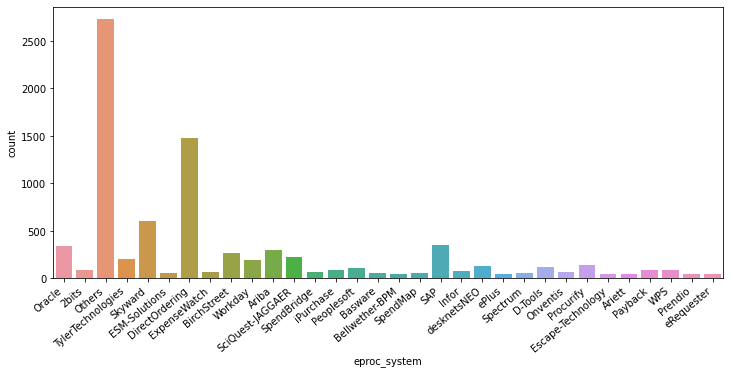

In [23]:
plt.figure(figsize=(12,5))
ax =sns.countplot(x='eproc_system', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [ ]:
print(df.head())
print(df.tail())

In [ ]:
import plotly.express as px

fig = px.pie(df, values=df["country"].value_counts().values, names=df["country"].value_counts().index, title='Business accounts per country')
fig.update_traces(hoverinfo='label+percent')
fig.show()


In [1089]:
#TARGET VARIABLE
fig = px.pie(df, values=df["automated_tier"].value_counts().values, names=df["automated_tier"].value_counts().index, title='Business Revenue Size')
fig.update_traces(hoverinfo='label+percent')
fig.show()

In [1090]:
fig = px.pie(df, values=df["industry"].value_counts().values, names=df["industry"].value_counts().index, title='Industry Tier')
fig.update_traces(hoverinfo='label+percent')
fig.show()

In [1091]:
fig = px.pie(df, values=df["territory"].value_counts().values, names=df["territory"].value_counts().index, title='Territory')
fig.update_traces(hoverinfo='label+percent')
fig.show()

In [25]:
df2 = df[df["ppimode_accountlevel"] != 'Test']

In [26]:
df2["ppimode_accountlevel"]

3       Active
4       Active
6       Active
9       Active
10      Active
         ...  
8280    Active
8282    Active
8283    Active
8284    Active
8286    Active
Name: ppimode_accountlevel, Length: 4264, dtype: object

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

<Figure size 864x360 with 0 Axes>

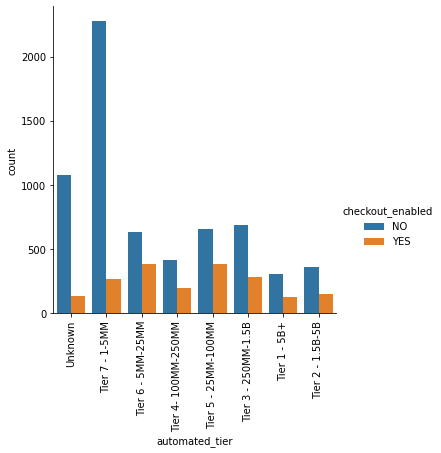

In [27]:
# All accounts
plt.figure(figsize=(12,5))
ax = sns.catplot(x='automated_tier',hue='checkout_enabled',data=df,kind="count")
plt.xticks(rotation=90)


In [111]:
df_matrix.columns

Index(['no_of_paymentinstruments', 'no_of_shippingaddresses', 'user_count',
       'ppimode_accountlevel_Test', 'feature_PPI', 'checkout_enabled_YES',
       'group_pay_enabled_YES', 'self_pay_enabled_YES',
       'weekend_delivery_ENABLED', 'tax_exemption_disabled_YES', 'country_CA',
       'country_DE', 'country_ES', 'country_FR', 'country_IT', 'country_JP',
       'country_UK', 'country_US', 'territory_Commercial',
       'territory_Education', 'territory_Enterprise', 'territory_Government',
       'territory_Large Enterprise', 'territory_Small & Medium',
       'territory_Unknown', 'industry_Com', 'industry_Edu', 'industry_Gov',
       'industry_HC', 'industry_Unclassified', 'checkout_enabled_year',
       'registeration_year', 'eproc_system_code', 'recon_sysname_code',
       'automated_tier_code'],
      dtype='object')

Statistical Analysis

Binomial distribution 
Check Payment Type is Group-level OR NOT

In [28]:
df.group_pay_enabled.value_counts()

YES    5745
NO     2544
Name: group_pay_enabled, dtype: int64

In [29]:
from scipy.stats import binom
binom.pmf(k=5745, #Number of successes
          n=8289,# Number of trials
          p=0.7 )# Probability of success

0.0037147438002170124

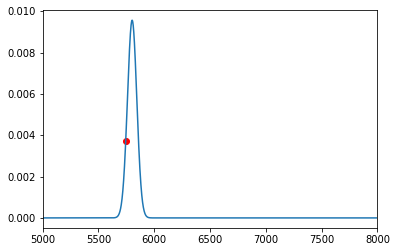

In [30]:
X=np.arange(1,len(df)+1)
y=[binom.pmf(k=x,n=len(df),p=0.7) for x in X]

sns.lineplot(x=X, y=y)
plt.xlim(5000,8000)
plt.scatter(df.group_pay_enabled.value_counts()[0],
            binom.pmf(k=df.group_pay_enabled.value_counts()[0],n=len(df),p=0.7),color="red")
plt.show()

Normal Distribution

In [1098]:
def Normal(x,mu=0,sigma=1):
  return (np.exp(-0.5*((x-mu)/sigma)**2))/(sigma*(2*np.pi)**0.5)

In [1099]:
df["user_count"]

0         1.0
1         1.0
2         1.0
3        21.0
4       344.0
        ...  
8284      1.0
8285     12.0
8286     41.0
8287      3.0
8288      9.0
Name: user_count, Length: 8289, dtype: float64

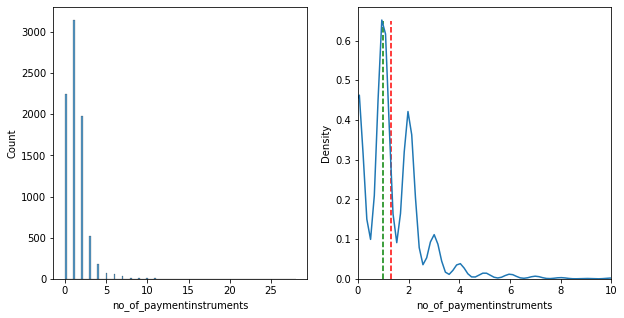

In [1100]:
fig,axs = plt.subplots(1,2,figsize=(10,5))
sns.histplot(data=df["no_of_paymentinstruments"], ax=axs[0])
sns.kdeplot(data=df["no_of_paymentinstruments"], ax=axs[1])
axs[1].vlines(df["no_of_paymentinstruments"].mean(),0,0.65,linestyle="--",color="red")
axs[1].vlines(df["no_of_paymentinstruments"].median(),0,0.65,linestyle="--",color="green")
plt.xlim(0, 10)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

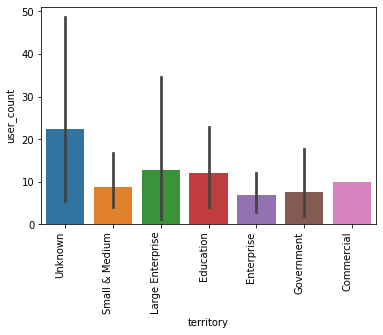

In [1101]:
sns.barplot(x=df["territory"], y=df["user_count"].value_counts(), data=df);
plt.xticks( rotation=90, horizontalalignment='right')

Qualitative Data Conversion

In [31]:
# get the dummies and store it in a variable
number_labels=df.describe(include="all").loc["unique"]
columns_for_dummies_1 = number_labels[number_labels==2].index.values.tolist()
columns_for_dummies_1
df1d = pd.get_dummies(df[columns_for_dummies_1],drop_first=True)

# Concatenate the dummies to original dataframe
merged = pd.concat([df,df1d],axis=1)
merged

#Convert other categorical data (categories > 2) to numeric
dummies2 = pd.get_dummies(data=df,columns=['country','territory',"industry"])
df_final=pd.concat([merged,dummies2],axis=1)
df_final
test = df_final.drop(['country','territory',"industry",'feature','ppimode_accountlevel','checkout_enabled','group_pay_enabled','self_pay_enabled','weekend_delivery','tax_exemption_disabled'], axis='columns')
#test = merged.drop(['feature','ppimode_accountlevel','checkout_enabled','group_pay_enabled','self_pay_enabled','weekend_delivery','tax_exemption_disabled'], axis='columns')
df_final = test.loc[:,~test.columns.duplicated()]
df_final.columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



Index(['encrypted_bussiness_account_id', 'name', 'registered_date',
       'eproc_system', 'automated_tier', 'recon_sysname',
       'checkout_enabled_date', 'no_of_paymentinstruments',
       'no_of_shippingaddresses', 'user_count', 'ppimode_accountlevel_Test',
       'feature_PPI', 'checkout_enabled_YES', 'group_pay_enabled_YES',
       'self_pay_enabled_YES', 'weekend_delivery_ENABLED',
       'tax_exemption_disabled_YES', 'country_CA', 'country_DE', 'country_ES',
       'country_FR', 'country_IT', 'country_JP', 'country_UK', 'country_US',
       'territory_Commercial', 'territory_Education', 'territory_Enterprise',
       'territory_Government', 'territory_Large Enterprise',
       'territory_Small & Medium', 'territory_Unknown', 'industry_Com',
       'industry_Edu', 'industry_Gov', 'industry_HC', 'industry_Unclassified'],
      dtype='object')

In [32]:
df_matrix = df_final.drop(["encrypted_bussiness_account_id","name"], axis='columns')

In [33]:
df_matrix["checkout_enabled_year"] = pd.DatetimeIndex(df_matrix['checkout_enabled_date']).year

In [34]:
df_matrix["registeration_year"] = pd.DatetimeIndex(df_matrix['registered_date']).year

In [35]:
df_matrix.drop(["checkout_enabled_date","registered_date"], axis='columns', inplace=True)

In [1107]:
df_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8289 entries, 0 to 8288
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   eproc_system                8289 non-null   object 
 1   automated_tier              8289 non-null   object 
 2   recon_sysname               8289 non-null   object 
 3   no_of_paymentinstruments    8289 non-null   float64
 4   no_of_shippingaddresses     8289 non-null   float64
 5   user_count                  8289 non-null   float64
 6   ppimode_accountlevel_Test   8289 non-null   uint8  
 7   feature_PPI                 8289 non-null   uint8  
 8   checkout_enabled_YES        8289 non-null   uint8  
 9   group_pay_enabled_YES       8289 non-null   uint8  
 10  self_pay_enabled_YES        8289 non-null   uint8  
 11  weekend_delivery_ENABLED    8289 non-null   uint8  
 12  tax_exemption_disabled_YES  8289 non-null   uint8  
 13  country_CA                  8289 

In [36]:
df_matrix["recon_sysname"].count()
pd.value_counts(df_matrix["recon_sysname"]).sum()

8289

In [37]:
series = pd.value_counts(df["recon_sysname"])
mask = (series/series.sum() * 100).lt(0.1)
# To replace df['column'] use np.where I.e 
#df["recon_sysname"] = 
df_matrix["recon_sysname"] = np.where(df["recon_sysname"].isin(series[mask].index),'Other',df["recon_sysname"])

In [38]:
#df["recon_sysname"] = 
df_matrix["recon_sysname"].value_counts()

Other                         5883
Visa                           966
Mastercard                     815
Coupa                          242
Amex                           232
Ariba                           80
SciQuest                        61
OracleSupplierNetwork(OSN)      10
Name: recon_sysname, dtype: int64

In [39]:
df_matrix.eproc_system = pd.Categorical(df_matrix.eproc_system)
df_matrix['eproc_system_code'] = df_matrix.eproc_system.cat.codes

In [106]:
df["automated_tier",'']

<bound method IndexOpsMixin.value_counts of 0                   Unknown
1                   Unknown
2            Tier 7 - 1-5MM
3         Tier 6 - 5MM-25MM
4       Tier 4- 100MM-250MM
               ...         
8284         Tier 7 - 1-5MM
8285      Tier 6 - 5MM-25MM
8286       Tier 2 - 1.5B-5B
8287    Tier 4- 100MM-250MM
8288         Tier 7 - 1-5MM
Name: automated_tier, Length: 8289, dtype: object>

In [ ]:
df_matrix['automated_tier_code'].

In [40]:
df_matrix.recon_sysname = pd.Categorical(df_matrix.recon_sysname)
df_matrix['recon_sysname_code'] = df_matrix.eproc_system.cat.codes

In [41]:
df_matrix.automated_tier = pd.Categorical(df_matrix.automated_tier)
df_matrix['automated_tier_code'] = df_matrix.automated_tier.cat.codes

In [42]:
#df_matrix.country = pd.Categorical(df_matrix.country)
#df_matrix['country_code'] = df_matrix.country.cat.codes

In [1117]:
#df_matrix.industry = pd.Categorical(df_matrix.industry)
#df_matrix['industry_code'] = df_matrix.industry.cat.codes

In [1118]:
#df_matrix.territory = pd.Categorical(df_matrix.territory)
#df_matrix['territory_code'] = df_matrix.territory.cat.codes

In [43]:
#df_matrix.drop(["eproc_system","recon_sysname","automated_tier","country", 'industry','territory'],axis='columns',inplace=True)
df_matrix.drop(["eproc_system","recon_sysname","automated_tier"],axis='columns',inplace=True)

In [44]:
correlation_matrix=df_matrix.corr(method="pearson")
correlation_matrix

,no_of_paymentinstruments,no_of_shippingaddresses,user_count,ppimode_accountlevel_Test,feature_PPI,checkout_enabled_YES,group_pay_enabled_YES,self_pay_enabled_YES,weekend_delivery_ENABLED,tax_exemption_disabled_YES,...,industry_Com,industry_Edu,industry_Gov,industry_HC,industry_Unclassified,checkout_enabled_year,registeration_year,eproc_system_code,recon_sysname_code,automated_tier_code
no_of_paymentinstruments,1.000000,0.113115,0.024744,-0.204316,-0.052357,0.042784,0.394078,-0.393082,-0.180012,0.023130,...,-0.033996,0.052645,-0.004533,0.042734,-0.061811,-0.032124,-0.102422,-0.004405,-0.004405,0.002744
no_of_shippingaddresses,0.113115,1.000000,0.005469,-0.019351,-0.015053,0.004263,0.038979,-0.038685,-0.034002,0.000295,...,0.011589,-0.007351,-0.003122,0.003678,-0.012567,-0.019400,-0.026843,-0.000550,-0.000550,-0.008741
user_count,0.024744,0.005469,1.000000,-0.080696,0.037710,0.049644,0.041141,-0.043077,-0.084104,0.027468,...,-0.022453,0.040918,-0.007591,0.006651,-0.022644,-0.009943,-0.057791,0.027807,0.027807,-0.107746
ppimode_accountlevel_Test,-0.204316,-0.019351,-0.080696,1.000000,0.325796,-0.290954,-0.400207,0.398388,0.547453,-0.008421,...,0.114895,-0.161573,0.013287,-0.042619,0.069866,-0.194255,0.033034,0.083788,0.083788,0.126917
feature_PPI,-0.052357,-0.015053,0.037710,0.325796,1.000000,0.189523,-0.227451,0.225534,0.126603,0.017121,...,-0.099940,0.116015,0.005811,0.034141,-0.032951,-0.161001,-0.239440,0.339988,0.339988,-0.043203
checkout_enabled_YES,0.042784,0.004263,0.049644,-0.290954,0.189523,1.000000,0.221498,-0.218068,-0.229655,-0.015062,...,-0.239952,0.358718,-0.051537,-0.033293,-0.022415,0.226368,-0.065598,0.215777,0.215777,-0.178357
group_pay_enabled_YES,0.394078,0.038979,0.041141,-0.400207,-0.227451,0.221498,1.000000,-0.991784,-0.238257,0.016732,...,-0.076291,0.106538,-0.004177,0.036518,-0.058673,0.167471,0.033265,-0.046587,-0.046587,-0.191548
self_pay_enabled_YES,-0.393082,-0.038685,-0.043077,0.398388,0.225534,-0.218068,-0.991784,1.000000,0.237720,-0.016412,...,0.073158,-0.106404,0.005988,-0.034429,0.060803,-0.165184,-0.032355,0.045194,0.045194,0.193920
weekend_delivery_ENABLED,-0.180012,-0.034002,-0.084104,0.547453,0.126603,-0.229655,-0.238257,0.237720,1.000000,0.010985,...,0.151309,-0.233001,0.006069,-0.026877,0.103623,0.015514,0.259193,-0.028303,-0.028303,0.092520
tax_exemption_disabled_YES,0.023130,0.000295,0.027468,-0.008421,0.017121,-0.015062,0.016732,-0.016412,0.010985,1.000000,...,0.008961,-0.005853,-0.011616,0.013316,-0.012540,-0.031723,-0.028490,0.009328,0.009328,-0.012527


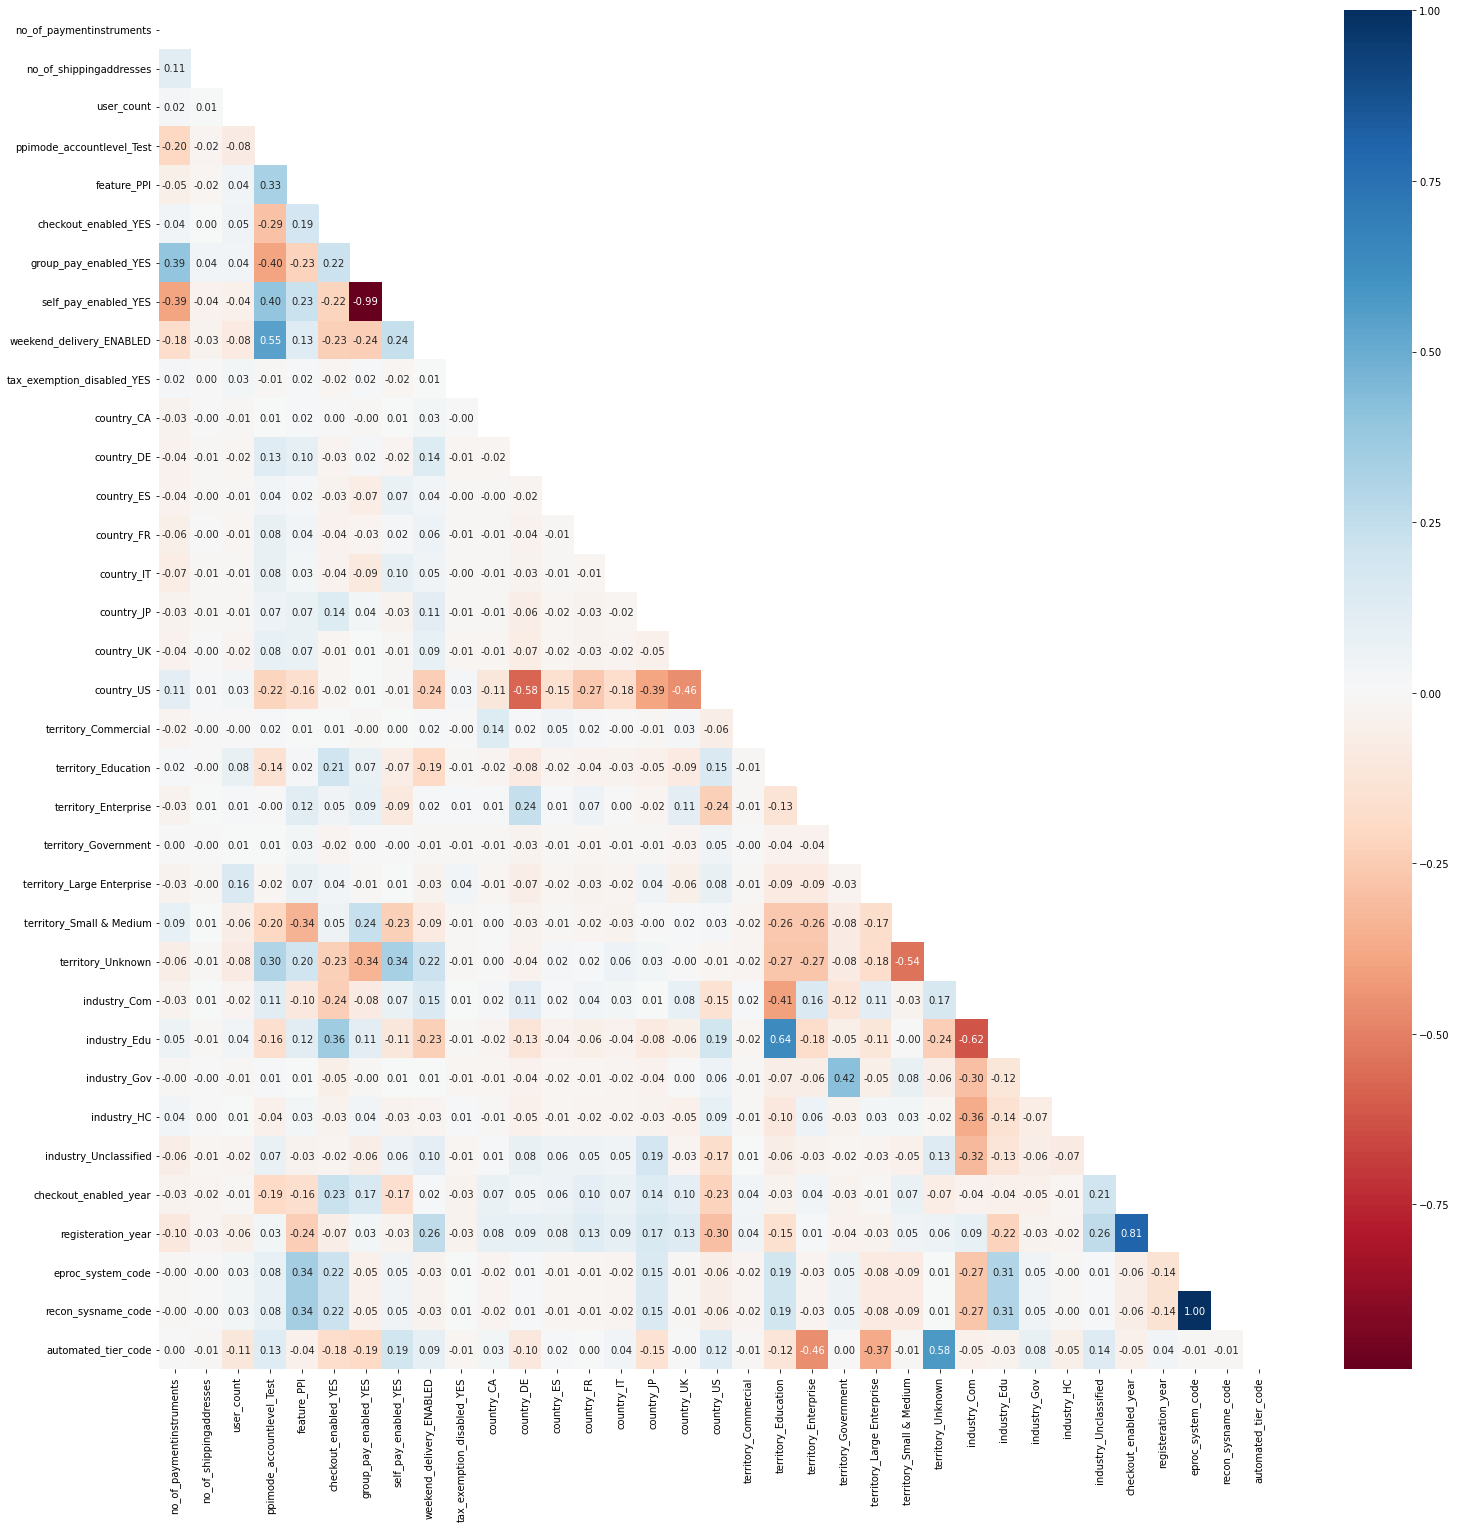

In [45]:
fig, axs = plt.subplots(figsize=(25,25))
sns.heatmap(correlation_matrix, cmap="RdBu",
            annot=True,mask=np.triu(correlation_matrix),fmt='.2f')
plt.show()

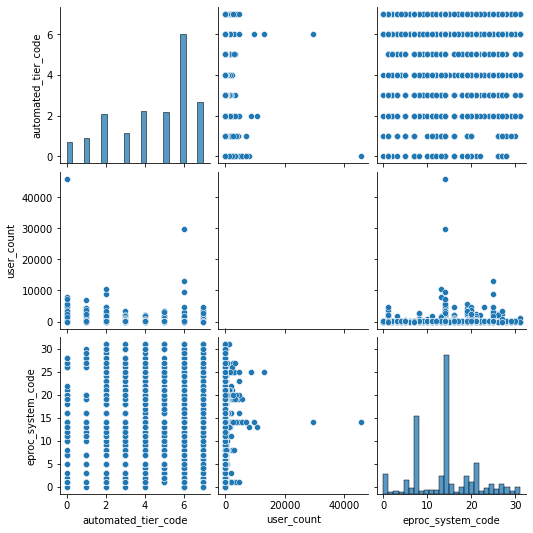

In [1122]:
sns.pairplot(df_matrix[["automated_tier_code","user_count","eproc_system_code"]])

PCA

In [1123]:
#Standardize the Data
from sklearn.preprocessing import StandardScaler
features = df_matrix.columns
# Separating out the features
x = df_matrix.loc[:, df_matrix.columns != 'automated_tier_code'].values
# Separating out the target
y = df_matrix.loc[:,['automated_tier_code']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [1124]:
df_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8289 entries, 0 to 8288
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   no_of_paymentinstruments    8289 non-null   float64
 1   no_of_shippingaddresses     8289 non-null   float64
 2   user_count                  8289 non-null   float64
 3   ppimode_accountlevel_Test   8289 non-null   uint8  
 4   feature_PPI                 8289 non-null   uint8  
 5   checkout_enabled_YES        8289 non-null   uint8  
 6   group_pay_enabled_YES       8289 non-null   uint8  
 7   self_pay_enabled_YES        8289 non-null   uint8  
 8   weekend_delivery_ENABLED    8289 non-null   uint8  
 9   tax_exemption_disabled_YES  8289 non-null   uint8  
 10  country_CA                  8289 non-null   uint8  
 11  country_DE                  8289 non-null   uint8  
 12  country_ES                  8289 non-null   uint8  
 13  country_FR                  8289 

In [1125]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=2)
principalComponents = pca1.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [1126]:
finalDf = pd.concat([principalDf, df_matrix[['automated_tier_code']]], axis = 1)

In [1127]:
finalDf

,principal component 1,principal component 2,automated_tier_code
0,-0.507992,-1.049187,7
1,-4.493987,-0.564726,7
2,-1.184639,1.593934,6
3,2.971990,-0.438883,5
4,0.161848,-0.981030,3
...,...,...,...
8284,1.763111,-2.398010,6
8285,2.626760,2.340081,5
8286,0.661544,-0.596604,1
8287,-0.514817,-1.048211,3


0.8553458059366698


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



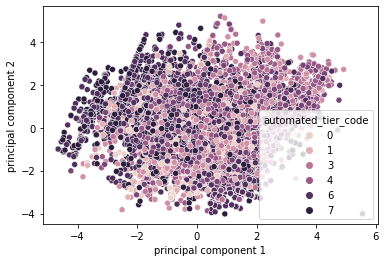

In [1128]:
print(pca.explained_variance_ratio_.sum())
sns.scatterplot(finalDf["principal component 1"],finalDf["principal component 2"], hue=df_matrix['automated_tier_code'])
plt.show()

In [1129]:
X = df_matrix.loc[:, df_matrix.columns != 'automated_tier_code'].values

In [1130]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate="auto",init='random', random_state=1).fit_transform(X)

In [1131]:
X_embedded

array([[-32.833397 ,  -6.2565217],
       [ 41.539062 , -29.549683 ],
       [-39.345478 , -26.108196 ],
       ...,
       [ 16.10538  ,  62.294434 ],
       [-11.768238 , -20.469482 ],
       [ -6.0357213,   5.760973 ]], dtype=float32)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



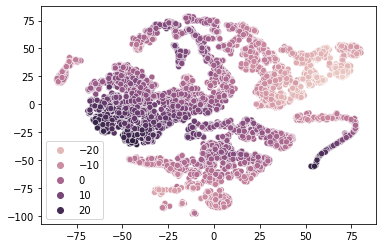

In [1132]:

x = X_embedded[:,0]
y = X_embedded[:,1]

sns.scatterplot(x,y,z,hue=df_matrix['automated_tier_code'])
plt.show()

In [1133]:
#Standardize the Data
from sklearn.preprocessing import StandardScaler
features = df_matrix.columns
# Separating out the features
x = df_matrix.loc[:, df_matrix.columns != 'automated_tier_code'].values
# Separating out the target
y = df_matrix.loc[:,['automated_tier_code']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [1134]:
#PCA Projection to 10D
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6', 'PC7','PC8','PC9','PC10','PC11', 'PC12','PC13','PC14','PC15','PC16', 'PC17','PC18','PC19','PC20'])
finalDf = pd.concat([principalDf, df_matrix[['automated_tier_code']]], axis = 1)

0.8553458059366696


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



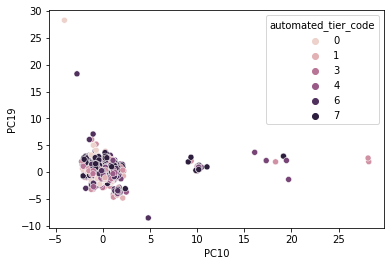

In [1135]:
print(pca.explained_variance_ratio_.sum())
sns.scatterplot(finalDf["PC10"],finalDf["PC19"], hue=df_matrix['automated_tier_code'])
plt.show()

In [1136]:
pca.explained_variance_ratio_.sum()*100

85.53458059366696

In [1137]:
df_matrix.columns

Index(['no_of_paymentinstruments', 'no_of_shippingaddresses', 'user_count',
       'ppimode_accountlevel_Test', 'feature_PPI', 'checkout_enabled_YES',
       'group_pay_enabled_YES', 'self_pay_enabled_YES',
       'weekend_delivery_ENABLED', 'tax_exemption_disabled_YES', 'country_CA',
       'country_DE', 'country_ES', 'country_FR', 'country_IT', 'country_JP',
       'country_UK', 'country_US', 'territory_Commercial',
       'territory_Education', 'territory_Enterprise', 'territory_Government',
       'territory_Large Enterprise', 'territory_Small & Medium',
       'territory_Unknown', 'industry_Com', 'industry_Edu', 'industry_Gov',
       'industry_HC', 'industry_Unclassified', 'checkout_enabled_year',
       'registeration_year', 'eproc_system_code', 'recon_sysname_code',
       'automated_tier_code'],
      dtype='object')

In [1138]:
df_matrix["automated_tier_code"].value_counts()

6    2539
7    1205
4    1037
5    1014
2     972
3     600
1     501
0     421
Name: automated_tier_code, dtype: int64

In [1139]:
df_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8289 entries, 0 to 8288
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   no_of_paymentinstruments    8289 non-null   float64
 1   no_of_shippingaddresses     8289 non-null   float64
 2   user_count                  8289 non-null   float64
 3   ppimode_accountlevel_Test   8289 non-null   uint8  
 4   feature_PPI                 8289 non-null   uint8  
 5   checkout_enabled_YES        8289 non-null   uint8  
 6   group_pay_enabled_YES       8289 non-null   uint8  
 7   self_pay_enabled_YES        8289 non-null   uint8  
 8   weekend_delivery_ENABLED    8289 non-null   uint8  
 9   tax_exemption_disabled_YES  8289 non-null   uint8  
 10  country_CA                  8289 non-null   uint8  
 11  country_DE                  8289 non-null   uint8  
 12  country_ES                  8289 non-null   uint8  
 13  country_FR                  8289 

In [46]:
from sklearn.preprocessing import StandardScaler
features = df_matrix.columns
# Separating out the features
x = df_matrix.loc[:, df_matrix.columns != 'automated_tier_code'].values
# Separating out the target
y = df_matrix.loc[:,['automated_tier_code']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [1166]:
# Alternate method
from sklearn.decomposition import PCA
# Make an instance of the Model
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6', 'PC7','PC8','PC9','PC10','PC11', 'PC12','PC13','PC14','PC15','PC16', 'PC17','PC18','PC19','PC20'])
finalDf = pd.concat([principalDf, df_matrix[['automated_tier_code']]], axis = 1)

In [116]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.25, random_state=1)

In [65]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC()

In [1193]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=5)
clf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(random_state=5)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier(n_neighbors=1)

In [82]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=1).fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [88]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=25, random_state=1)
clf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(max_depth=25, random_state=1)

In [89]:
y_pred_train = clf.predict(x_train)

In [51]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [94]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.50      0.55      0.52       108
           1       0.36      0.31      0.33       120
           2       0.45      0.51      0.48       247
           3       0.20      0.15      0.17       142
           4       0.38      0.41      0.40       258
           5       0.46      0.32      0.38       271
           6       0.61      0.74      0.67       636
           7       0.52      0.40      0.45       291

    accuracy                           0.49      2073
   macro avg       0.43      0.42      0.42      2073
weighted avg       0.48      0.49      0.48      2073



In [91]:
f1_score(y_train,y_pred_train,average='micro')

0.9491634491634492

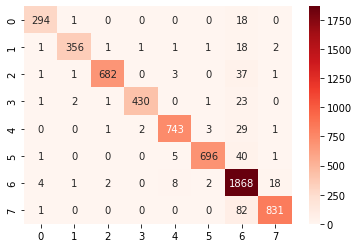

In [78]:
confusion_matrix(y_train,y_pred_train)
sns.heatmap(confusion_matrix(y_train,y_pred_train),
            annot = True, cmap="Reds",fmt='d')
plt.show()

In [ ]:
print(classification_report(y_train,y_pred_train))

In [92]:
y_pred_test = clf.predict(x_test)

In [93]:
f1_score(y_test,y_pred_test,average='micro')

0.492040520984081

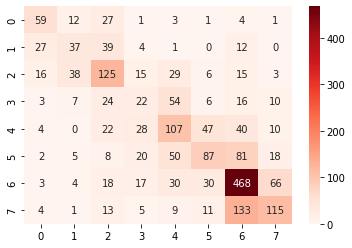

In [81]:
confusion_matrix(y_test,y_pred_test)
sns.heatmap(confusion_matrix(y_test,y_pred_test),
            annot = True, cmap="Reds",fmt='d')
plt.show()

In [101]:
x_train

array([[-0.95126265, -0.055191  , -0.11023082, ..., -0.15792538,
         0.02388013,  0.02388013],
       [-0.22224859, -0.055191  , -0.11160715, ..., -0.15792538,
        -0.98529449, -0.98529449],
       [ 0.50676548, -0.03719422, -0.09233861, ..., -0.15792538,
         0.74471915,  0.74471915],
       ...,
       [-0.22224859, -0.055191  , -0.11160715, ..., -0.86020192,
         0.02388013,  0.02388013],
       [-0.22224859, -0.055191  , -0.1088545 , ...,  1.94890424,
         0.02388013,  0.02388013],
       [-0.22224859,  0.09778165,  0.65087663, ..., -1.56247846,
         1.03305475,  1.03305475]])

In [ ]:
print(classification_report(y_test,y_pred_test))

In [ ]:
#Hypothesis Testing

HYpothesis Testing
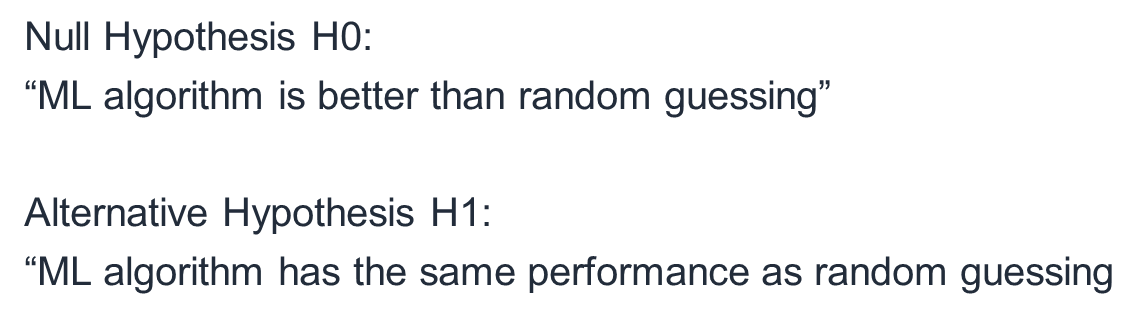

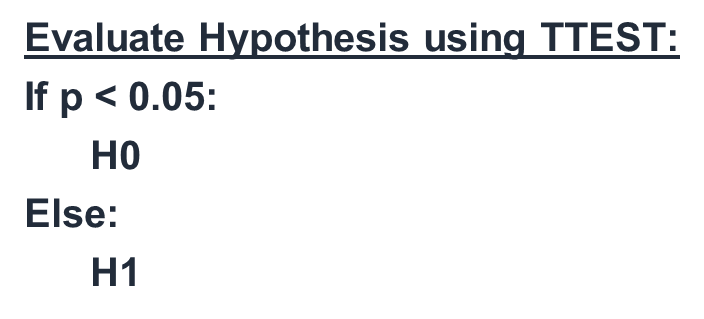

In [118]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(x_train, y_train)
y_pred_train = dummy_clf.predict(x_train)
y_pred_test = dummy_clf.predict(x_test)

In [119]:
dummy_clf.score(x_train, y_pred_train)

0.12532175032175033

In [120]:
dummy_clf.score(x_test, y_pred_test)

0.11095031355523396

In [122]:
from mlxtend.evaluate import paired_ttest_5x2cv
t, p = paired_ttest_5x2cv(estimator1=dummy_clf, estimator2=clf, X=x_test, y=y_pred_test, scoring='accuracy', random_seed=1)

In [123]:
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

P-value: 0.001, t-Statistic: 7.299


In [124]:
if p <= 0.05:
	print('Difference between mean performance is probably real')
else:
	print('Algorithms probably have the same performance')

Difference between mean performance is probably real
